In [1]:
import sklearn as sk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

* Reading the csv file

In [2]:
la_crimes = pd.read_csv('LA Crime_Data_from_2010_to_2019.csv')
la_crimes.rename(columns={'AREA ': 'AREA'}, inplace = True)
la_crimes

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,1307355,02/20/2010 12:00:00 AM,02/20/2010 12:00:00 AM,1350,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,...,AA,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695
1,11401303,09/13/2010 12:00:00 AM,09/12/2010 12:00:00 AM,45,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962
2,70309629,08/09/2010 12:00:00 AM,08/09/2010 12:00:00 AM,1515,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,...,IC,Invest Cont,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,34.0224,-118.2524
3,90631215,01/05/2010 12:00:00 AM,01/05/2010 12:00:00 AM,150,6,Hollywood,646,2,900,VIOLATION OF COURT ORDER,...,IC,Invest Cont,900.0,998.0,NaN,NaN,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295
4,100100501,01/03/2010 12:00:00 AM,01/02/2010 12:00:00 AM,2100,1,Central,176,1,122,"RAPE, ATTEMPTED",...,IC,Invest Cont,122.0,NaN,NaN,NaN,8TH ST,SAN PEDRO ST,34.0387,-118.2488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2114694,190608903,03/28/2019 12:00:00 AM,03/28/2019 12:00:00 AM,400,6,Hollywood,644,1,648,ARSON,...,IC,Invest Cont,648.0,NaN,NaN,NaN,1400 N LA BREA AV,NaN,34.0962,-118.3490
2114695,190715222,08/15/2019 12:00:00 AM,08/14/2019 12:00:00 AM,1810,7,Wilshire,701,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($400 AND OVER),...,IC,Invest Cont,331.0,NaN,NaN,NaN,WILLOUGHBY AV,ORLANDO AV,34.0871,-118.3732
2114696,192004409,01/06/2019 12:00:00 AM,01/06/2019 12:00:00 AM,2100,20,Olympic,2029,2,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,...,IC,Invest Cont,930.0,NaN,NaN,NaN,6TH,VIRGIL,34.0637,-118.2870
2114697,191716777,10/17/2019 12:00:00 AM,10/16/2019 12:00:00 AM,1800,17,Devonshire,1795,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,IC,Invest Cont,420.0,NaN,NaN,NaN,17200 NAPA ST,NaN,34.2266,-118.5085


## DR_NO column
* We see that the column `DR_NO` is a unique code for each row, that means each crime reported has a different code

In [3]:
la_crimes['DR_NO'].value_counts()

151001085    1
161811979    1
111721424    1
121320908    1
121316814    1
            ..
130712581    1
130718726    1
151714826    1
151712779    1
151001091    1
Name: DR_NO, Length: 2114699, dtype: int64

## Date Rptd and DATE OCC columns
* We see that all the dates have the time of 12:00:00 AM

In [4]:
la_crimes['Date Rptd'].str[-8:].value_counts() #selecting only the time and getting the different values of it

00:00 AM    2114699
Name: Date Rptd, dtype: int64

In [5]:
la_crimes['DATE OCC'].str[-8:].value_counts() #selecting only the time and getting the different values of it

00:00 AM    2114699
Name: DATE OCC, dtype: int64

* As result, we can delete the data of the time because it does not give additional information to us

In [6]:
la_crimes['Date Rptd'] = la_crimes['Date Rptd'].str[:10] #only keeping the data of the date without the time

In [7]:
la_crimes['DATE OCC'] = la_crimes['DATE OCC'].str[:10] #only keeping the data

* Now we are going to bring the date format to the appropriate one for databases: YYYY-MM-DD

In [8]:
la_crimes['Date Rptd'] = pd.to_datetime(la_crimes['Date Rptd'])
la_crimes['DATE OCC'] = pd.to_datetime(la_crimes['DATE OCC'])
la_crimes['Date Rptd'].sample(5)

990543    2014-04-09
450115    2013-01-28
1051297   2015-11-29
294232    2011-06-06
87567     2010-01-02
Name: Date Rptd, dtype: datetime64[ns]

## TIME OCC column
* Now we have to fix the column  `TIME OCC` to a '24hour:minutes' format
* First we transform the column to datatype string because it was integer
* Then we add  '00' in front of every date (because the rows with time occured at 12AM have no values for hours
* Lastly we only select the right string characters

In [9]:
la_crimes['TIME OCC'] = la_crimes['TIME OCC'].astype(str)

In [10]:
la_crimes['TIME OCC']= '00'+la_crimes['TIME OCC']

In [11]:
la_crimes['TIME OCC'] = la_crimes['TIME OCC'].str[-4:-2] + ':' +la_crimes['TIME OCC'].str[-2:]

* We join the  columns `DATE OCC` and `TIME OCC` into the column `DATE OCC` so that it will be in the format YYYY-MM-DD hh:mm. It will be saved as datatype datetime YYYY-MM-DD hh:mm:ss in the database
* We drop the column `TIME OCC`

In [12]:
la_crimes['DATE OCC'] = la_crimes['DATE OCC'].astype(str) +' ' + la_crimes['TIME OCC']
la_crimes['DATE OCC'] = pd.to_datetime(la_crimes['DATE OCC'])

In [13]:
la_crimes = la_crimes.drop(['TIME OCC'], axis=1)

## Mocodes column
We see that some crime reports have null values for the column of `Mocodes`
* We replace those values with the value `unknown`

In [14]:
la_crimes.loc[la_crimes['Mocodes'].isna()]

,DR_NO,Date Rptd,DATE OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
15,100100535,2010-01-17,2010-01-16 17:35:00,1,Central,185,2,946,OTHER MISCELLANEOUS CRIME,NaN,...,IC,Invest Cont,946.0,999.0,NaN,NaN,300 E OLYMPIC BL,NaN,34.0389,-118.2550
28,100100578,2010-02-05,2010-02-03 12:55:00,1,Central,185,2,946,OTHER MISCELLANEOUS CRIME,NaN,...,IC,Invest Cont,946.0,999.0,NaN,NaN,1200 MAPLE AV,NaN,34.0357,-118.2563
51,100100654,2010-02-27,2010-02-27 19:55:00,1,Central,174,2,946,OTHER MISCELLANEOUS CRIME,NaN,...,AA,Adult Arrest,946.0,NaN,NaN,NaN,W 7TH ST,S SPRING ST,34.0445,-118.2523
79,100100730,2010-03-23,2010-03-20 12:15:00,1,Central,111,2,647,THROWING OBJECT AT MOVING VEHICLE,NaN,...,IC,Invest Cont,647.0,NaN,NaN,NaN,CESAR E CHAVEZ,FIGUEROA ST,34.0627,-118.2463
102,100100786,2010-04-08,2010-04-08 02:20:00,1,Central,161,1,510,VEHICLE - STOLEN,NaN,...,IC,Invest Cont,510.0,520.0,NaN,NaN,FRANCISCO ST,8TH ST,34.0481,-118.2633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2114663,190417846,2019-12-11,2019-12-06 18:00:00,4,Hollenbeck,423,1,510,VEHICLE - STOLEN,NaN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,1100 N MISSION RD,NaN,34.0651,-118.2116
2114670,191710450,2019-05-25,2019-05-25 06:30:00,17,Devonshire,1761,1,510,VEHICLE - STOLEN,NaN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,9200 ETON AV,NaN,34.2376,-118.5947
2114683,191816545,2019-07-22,2019-07-17 20:30:00,18,Southeast,1836,2,922,CHILD STEALING,NaN,...,AO,Adult Other,922.0,NaN,NaN,NaN,10400 FIRTH AV,NaN,33.9424,-118.2477
2114691,191307168,2019-02-28,2019-02-28 07:00:00,13,Newton,1394,1,510,VEHICLE - STOLEN,NaN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,100 E 67TH ST,NaN,33.9788,-118.2739


In [15]:
indexes_null_mo = la_crimes.loc[la_crimes ['Mocodes'].isna()].index
la_crimes.loc[indexes_null_mo,'Mocodes'] = 'unknown'

## Vict Age column
* Now we are going to fix the column `Vict Age` that don't make any sense
* Specifically we are going to change all negative age numbers to `0` which we consider missing value.

In [16]:
la_crimes['Vict Age'].value_counts()

 0      369886
 25      48101
 26      47469
 27      47011
 24      46739
         ...  
-7          15
-8           7
-9           4
 114         1
 118         1
Name: Vict Age, Length: 110, dtype: int64

In [17]:
indexes_neg_age = la_crimes.loc[la_crimes['Vict Age'] < 0]['Vict Age'].index #finding the indexes of negative ages
la_crimes.loc[indexes_neg_age,'Vict Age'] = 0

## Vict Sex column
* Now we fix the column `Vict Sex` which is the victim's sex.
* According to the description the values are: F - Female, M - Male, X - Unknown

In [18]:
la_crimes['Vict Sex'].value_counts()

M    974309
F    888499
X     55129
H        73
N        17
-         1
Name: Vict Sex, dtype: int64

* We see there are a bunch of irrelevant values which we change to 'X'

In [19]:
indexes_wrong_sex = la_crimes.loc[(la_crimes['Vict Sex'] != 'M') & (la_crimes['Vict Sex'] != 'F')].index
la_crimes.loc[indexes_wrong_sex,'Vict Sex'] = 'X'

## Vict Descent column
Now we will fix the column `Vict Descent`. We see there are a bunch of nan values. Also, according to the description of the dataset the different descents are: : 
* A - Other Asian 
* B - Black 
* C - Chinese  
* D - Cambodian 
* F - Filipino 
* G - Guamanian 
* H - Hispanic/Latin/Mexican 
* I - American Indian/Alaskan Native 
* J - Japanese 
* K - Korean 
* L - Laotian 
* O - Other 
* P - Pacific Islander 
* S - Samoan 
* U - Hawaiian 
* V - Vietnamese 
* W - White 
* X - Unknown 
* Z - Asian Indian

In [20]:
print("The reported crimes with Nan (null) values for the column Vict Descent are:")
len(la_crimes.loc[la_crimes['Vict Descent'].isna()])

The reported crimes with Nan (null) values for the column Vict Descent are:


196718

In [21]:
la_crimes['Vict Descent'].value_counts()

H    725348
W    510158
B    335102
O    202969
X     78147
A     51109
K      9141
F      2553
C      1061
I       945
J       418
P       343
V       201
U       190
Z       136
G        85
S        31
D        23
L        18
-         3
Name: Vict Descent, dtype: int64

In [22]:
indexes_wrong_decent = la_crimes.loc[(la_crimes['Vict Descent'] == '-') | (la_crimes['Vict Descent'].isna())].index
la_crimes.loc[indexes_wrong_decent,'Vict Descent'] = 'X'

## Premis Cd and Premis Desc columns
Now we see that many rows have null values for the column `Premis Cd` 
* Because this column has float values, we replace the null values with `0`

In [23]:
la_crimes.loc[la_crimes['Premis Cd'].isna()]

,DR_NO,Date Rptd,DATE OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
6590,100121447,2010-12-12,2010-12-12 11:50:00,1,Central,185,1,110,CRIMINAL HOMICIDE,unknown,...,AA,Adult Arrest,110.0,NaN,NaN,NaN,200 W OLYMPIC BL,NaN,34.0409,-118.2574
32148,100913648,2010-06-21,2010-06-20 14:35:00,9,Van Nuys,915,1,510,VEHICLE - STOLEN,unknown,...,IC,Invest Cont,510.0,NaN,NaN,NaN,7000 VAN NUYS BL,NaN,34.1976,-118.4487
67340,100816222,2010-09-03,2010-04-16 00:01:00,8,West LA,803,2,813,CHILD ANNOYING (17YRS & UNDER),unknown,...,IC,Invest Cont,813.0,NaN,NaN,NaN,2000 MANDAVILLE C,NaN,34.0949,-118.5111
68276,100818222,2010-11-18,2010-10-16 16:00:00,8,West LA,811,2,812,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...,unknown,...,IC,Invest Cont,812.0,NaN,NaN,NaN,1100 LAS PULGAS RD,NaN,34.0528,-118.5393
71523,100908076,2010-03-16,2010-03-15 22:05:00,15,N Hollywood,1547,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),unknown,...,IC,Invest Cont,420.0,NaN,NaN,NaN,BECK,CHANDLER,34.1687,-118.3834
85649,101017796,2010-09-21,2010-09-08 17:20:00,10,West Valley,1067,2,813,CHILD ANNOYING (17YRS & UNDER),unknown,...,AO,Adult Other,813.0,NaN,NaN,NaN,5400 LOUISE AV,NaN,34.1694,-118.5098
92668,101114489,2010-06-18,2010-06-18 19:10:00,11,Northeast,1178,1,820,ORAL COPULATION,unknown,...,IC,Invest Cont,820.0,NaN,NaN,NaN,CYPRESS AV,FIGUEROA,34.0864,-118.2190
102768,101214269,2010-05-13,2010-05-12 18:00:00,12,77th Street,1242,1,235,CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT,unknown,...,IC,Invest Cont,235.0,NaN,NaN,NaN,6200 3RD AV,NaN,33.9837,-118.3206
107695,101223939,2010-09-17,2010-06-01 12:00:00,12,77th Street,1213,2,812,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...,unknown,...,IC,Invest Cont,812.0,NaN,NaN,NaN,1700 W 52ND ST,NaN,33.9951,-118.3068
124293,101410405,2010-04-12,2010-04-11 23:20:00,14,Pacific,1494,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),unknown,...,AA,Adult Arrest,420.0,NaN,NaN,NaN,300 WORLD WY,NaN,33.9440,-118.4073


In [24]:
la_crimes.loc[la_crimes['Premis Desc'] =='unknown'][['Premis Cd','Premis Desc']]

,Premis Cd,Premis Desc


In [25]:
indexes_null_premiscd = la_crimes.loc[la_crimes ['Premis Cd'].isna()].index
la_crimes.loc[indexes_null_premiscd,'Premis Cd'] = 0

Now we see that many rows have null values for the column `Premis Desc`

* We replace those null values with `unknown`

In [26]:
la_crimes.loc[la_crimes['Premis Desc'].isna()]

,DR_NO,Date Rptd,DATE OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
6590,100121447,2010-12-12,2010-12-12 11:50:00,1,Central,185,1,110,CRIMINAL HOMICIDE,unknown,...,AA,Adult Arrest,110.0,NaN,NaN,NaN,200 W OLYMPIC BL,NaN,34.0409,-118.2574
32148,100913648,2010-06-21,2010-06-20 14:35:00,9,Van Nuys,915,1,510,VEHICLE - STOLEN,unknown,...,IC,Invest Cont,510.0,NaN,NaN,NaN,7000 VAN NUYS BL,NaN,34.1976,-118.4487
67340,100816222,2010-09-03,2010-04-16 00:01:00,8,West LA,803,2,813,CHILD ANNOYING (17YRS & UNDER),unknown,...,IC,Invest Cont,813.0,NaN,NaN,NaN,2000 MANDAVILLE C,NaN,34.0949,-118.5111
68276,100818222,2010-11-18,2010-10-16 16:00:00,8,West LA,811,2,812,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...,unknown,...,IC,Invest Cont,812.0,NaN,NaN,NaN,1100 LAS PULGAS RD,NaN,34.0528,-118.5393
71523,100908076,2010-03-16,2010-03-15 22:05:00,15,N Hollywood,1547,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),unknown,...,IC,Invest Cont,420.0,NaN,NaN,NaN,BECK,CHANDLER,34.1687,-118.3834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2109009,190223459,2019-12-17,2019-12-15 21:45:00,2,Rampart,236,2,668,"EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)",0344 1309 1822 0913 1803,...,IC,Invest Cont,668.0,NaN,NaN,NaN,100 S ALVARADO ST,NaN,34.0667,-118.2703
2109581,191515929,2019-08-20,2019-08-20 05:40:00,15,N Hollywood,1599,1,310,BURGLARY,2018 0344 1309 1609 1402 1414 0384,...,IC,Invest Cont,310.0,998.0,NaN,NaN,3700 CAHUENGA BL,NaN,34.1350,-118.3612
2113695,190119416,2019-07-28,2019-07-27 18:00:00,1,Central,157,1,320,"BURGLARY, ATTEMPTED",1607,...,IC,Invest Cont,320.0,NaN,NaN,NaN,600 CROCKER ST,NaN,34.0417,-118.2443
2114205,191221441,2019-08-29,2019-08-29 01:00:00,12,77th Street,1268,1,110,CRIMINAL HOMICIDE,1100 0430 1402 1822 0906,...,AA,Adult Arrest,110.0,998.0,NaN,NaN,8100 S BROADWAY,NaN,33.9660,-118.2783


In [27]:
indexes_null_premisdesc = la_crimes.loc[la_crimes ['Premis Desc'].isna()].index
la_crimes.loc[indexes_null_premisdesc,'Premis Desc'] = 'unknown'

Theoretically, for the rows with `Premis Desc` = 'unknown', the column `Premis Cd` should be equal to $0$ (unknown). However, there are some rows with `Premis Cd` different than 0

In [28]:
la_crimes.loc[la_crimes['Premis Desc']=='unknown'][['Premis Desc','Premis Cd']]

,Premis Desc,Premis Cd
6590,unknown,0.0
32148,unknown,0.0
67340,unknown,0.0
68276,unknown,0.0
71523,unknown,0.0
...,...,...
2109009,unknown,418.0
2109581,unknown,256.0
2113695,unknown,256.0
2114205,unknown,256.0


In detail, the rows with `Premis Desc` = 'unknown', have the values of $0$ or $256$ or $418$ or $838$

In [29]:
la_crimes.loc[la_crimes['Premis Desc']=='unknown']['Premis Cd'].unique()

array([  0., 838., 418., 256.])

* Next up we see that all the rows with `Premis Cd` = $418$, have `Premis Desc` = 'unknown`
* Thus we can change `Premis Cd` to $0$ (unknown)

In [30]:
cd418 = la_crimes.loc[la_crimes['Premis Cd']==418][['Premis Desc','Premis Cd']]
cd418['Premis Desc'].unique()

array(['unknown'], dtype=object)

* Next up we see that all the rows with `Premis Cd` = $256$, have `Premis Desc` = 'unknown`
* Thus we can change `Premis Cd` to $0$ (unknown)

In [31]:
cd256 = la_crimes.loc[la_crimes['Premis Cd']== 256][['Premis Desc','Premis Cd']]
cd256['Premis Desc'].unique()

array(['unknown'], dtype=object)

* Next up we see that all the rows with `Premis Cd` = $838$, have `Premis Desc` = 'unknown`
* Thus we can change `Premis Cd` to $0$ (unknown)

In [32]:
cd838 = la_crimes.loc[la_crimes['Premis Cd']== 838][['Premis Desc','Premis Cd']]
cd838['Premis Desc'].unique()

array(['unknown'], dtype=object)

* We change all the rows with `Premis Cd` equal to $256$, $418$ or $838$, to $0$ (unknown)

In [33]:
indexes_wrong_premiscd = la_crimes.loc[(la_crimes ['Premis Cd'] == 256) | 
                                      (la_crimes ['Premis Cd'] == 418) |
                                      (la_crimes ['Premis Cd'] == 838)].index
la_crimes.loc[indexes_wrong_premiscd,'Premis Cd'] = 0

* Lastly, we transform `Premis Cd` from float to integer

In [34]:
la_crimes['Premis Cd'] = la_crimes['Premis Cd'].astype(int)

## Weapon Used Cd and Weapon Desc columns
Some rows have null values for the column `Weapon Used Cd`

* We replace those null values with `0` because this column contains float datatypes

In [35]:
la_crimes.loc[la_crimes['Weapon Used Cd'].isna()]

,DR_NO,Date Rptd,DATE OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,1307355,2010-02-20,2010-02-20 13:50:00,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,0913 1814 2000,...,AA,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695
1,11401303,2010-09-13,2010-09-12 00:45:00,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,...,IC,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962
2,70309629,2010-08-09,2010-08-09 15:15:00,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,0344,...,IC,Invest Cont,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,34.0224,-118.2524
5,100100506,2010-01-05,2010-01-04 16:50:00,1,Central,162,1,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),0344 1402,...,AA,Adult Arrest,442.0,NaN,NaN,NaN,700 W 7TH ST,NaN,34.0480,-118.2577
6,100100508,2010-01-08,2010-01-07 20:05:00,1,Central,182,1,330,BURGLARY FROM VEHICLE,0344,...,IC,Invest Cont,330.0,NaN,NaN,NaN,PICO BL,GRAND AV,34.0389,-118.2643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2114687,191408297,2019-03-11,2019-03-08 12:00:00,14,Pacific,1438,1,440,THEFT PLAIN - PETTY ($950 & UNDER),0344 1501 1608 1607 0349,...,IC,Invest Cont,440.0,NaN,NaN,NaN,3600 MIDVALE AV,NaN,34.0204,-118.4139
2114691,191307168,2019-02-28,2019-02-28 07:00:00,13,Newton,1394,1,510,VEHICLE - STOLEN,unknown,...,IC,Invest Cont,510.0,NaN,NaN,NaN,100 E 67TH ST,NaN,33.9788,-118.2739
2114695,190715222,2019-08-15,2019-08-14 18:10:00,7,Wilshire,701,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($400 AND OVER),1300 0344,...,IC,Invest Cont,331.0,NaN,NaN,NaN,WILLOUGHBY AV,ORLANDO AV,34.0871,-118.3732
2114697,191716777,2019-10-17,2019-10-16 18:00:00,17,Devonshire,1795,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),unknown,...,IC,Invest Cont,420.0,NaN,NaN,NaN,17200 NAPA ST,NaN,34.2266,-118.5085


In [36]:
indexes_null_weaponcd = la_crimes.loc[la_crimes ['Weapon Used Cd'].isna()].index
la_crimes.loc[indexes_null_weaponcd,'Weapon Used Cd'] = 0

Also rows have null values for the column `Weapon Desc`

* We replace those null values with `unknown` because this column contains object datatypes

In [37]:
la_crimes.loc[la_crimes['Weapon Desc'].isna()]

,DR_NO,Date Rptd,DATE OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,1307355,2010-02-20,2010-02-20 13:50:00,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,0913 1814 2000,...,AA,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695
1,11401303,2010-09-13,2010-09-12 00:45:00,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,...,IC,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962
2,70309629,2010-08-09,2010-08-09 15:15:00,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,0344,...,IC,Invest Cont,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,34.0224,-118.2524
5,100100506,2010-01-05,2010-01-04 16:50:00,1,Central,162,1,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),0344 1402,...,AA,Adult Arrest,442.0,NaN,NaN,NaN,700 W 7TH ST,NaN,34.0480,-118.2577
6,100100508,2010-01-08,2010-01-07 20:05:00,1,Central,182,1,330,BURGLARY FROM VEHICLE,0344,...,IC,Invest Cont,330.0,NaN,NaN,NaN,PICO BL,GRAND AV,34.0389,-118.2643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2114687,191408297,2019-03-11,2019-03-08 12:00:00,14,Pacific,1438,1,440,THEFT PLAIN - PETTY ($950 & UNDER),0344 1501 1608 1607 0349,...,IC,Invest Cont,440.0,NaN,NaN,NaN,3600 MIDVALE AV,NaN,34.0204,-118.4139
2114691,191307168,2019-02-28,2019-02-28 07:00:00,13,Newton,1394,1,510,VEHICLE - STOLEN,unknown,...,IC,Invest Cont,510.0,NaN,NaN,NaN,100 E 67TH ST,NaN,33.9788,-118.2739
2114695,190715222,2019-08-15,2019-08-14 18:10:00,7,Wilshire,701,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($400 AND OVER),1300 0344,...,IC,Invest Cont,331.0,NaN,NaN,NaN,WILLOUGHBY AV,ORLANDO AV,34.0871,-118.3732
2114697,191716777,2019-10-17,2019-10-16 18:00:00,17,Devonshire,1795,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),unknown,...,IC,Invest Cont,420.0,NaN,NaN,NaN,17200 NAPA ST,NaN,34.2266,-118.5085


In [38]:
indexes_null_weapondesc = la_crimes.loc[la_crimes ['Weapon Desc'].isna()].index
la_crimes.loc[indexes_null_weapondesc,'Weapon Desc'] = 'unknown'

Lastly, we transform the column `Weapon Used Cd` from float to integer

In [39]:
 la_crimes['Weapon Used Cd'] = la_crimes['Weapon Used Cd'].astype(int)

## Status and Status Desc columns
* Now we check the status of the crime incident
* We see that the columns `Status` and `Status Desc` have some differences.

In [40]:
la_crimes['Status'].value_counts()

IC    1623829
AO     250589
AA     219081
JA      15864
JO       5301
CC         29
13          1
19          1
TH          1
Name: Status, dtype: int64

In [41]:
la_crimes['Status Desc'].value_counts()

Invest Cont     1623829
Adult Other      250589
Adult Arrest     219081
Juv Arrest        15864
Juv Other          5301
UNK                  35
Name: Status Desc, dtype: int64

* We observe that all the values with a Status `CC` , `19` , `TH` , `13` have a Status Description `UNK`
* That's why we change the rows with a Status `19` , `TH` , `13`(because those only appear once) or null to `CC` 

In [42]:
la_crimes.loc[la_crimes['Status Desc'] == 'UNK']

,DR_NO,Date Rptd,DATE OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
100040,101208618,2010-03-02,2010-03-02 03:30:00,12,77th Street,1248,1,210,ROBBERY,0305 0342 0344 0416 1008,...,NaN,UNK,210.0,NaN,NaN,NaN,70TH ST,MENLO,33.9764,-118.2892
151803,101700682,2010-03-09,2010-03-08 11:55:00,17,Devonshire,1764,2,653,"CREDIT CARDS, FRAUD USE ($950.01 & OVER)",0377 0930 1402 1822,...,CC,UNK,653.0,998.0,NaN,NaN,19300 NORDHOFF ST,NaN,34.2355,-118.5536
160732,101721148,2010-11-15,2010-11-14 17:00:00,17,Devonshire,1756,2,900,VIOLATION OF COURT ORDER,1501,...,CC,UNK,900.0,NaN,NaN,NaN,17800 LASSEN ST,NaN,34.2504,-118.5216
219776,112109831,2011-04-29,2011-04-28 22:00:00,21,Topanga,2139,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($400 AND OVER),0344 1202,...,CC,UNK,331.0,NaN,NaN,NaN,7300 CORBIN AV,NaN,34.2031,-118.5623
285526,111204921,2011-01-14,2011-01-12 18:30:00,12,77th Street,1266,1,210,ROBBERY,0202 0305 0344 0370 0416 0429 0906 1251 1259 1822,...,CC,UNK,210.0,NaN,NaN,NaN,HOOVER ST,83RD ST,33.9632,-118.2871
400260,111225404,2011-10-26,2011-10-26 07:20:00,12,77th Street,1243,2,920,KIDNAPPING - GRAND ATTEMPT,0305 1251 1258 1313 1822,...,CC,UNK,920.0,NaN,NaN,NaN,68TH ST,VAN NESS,33.9790,-118.3112
485891,141215426,2014-06-30,2012-01-01 12:00:00,12,77th Street,1268,2,354,THEFT OF IDENTITY,0100 1822 0917,...,CC,UNK,354.0,NaN,NaN,NaN,200 E 85TH ST,NaN,33.9610,-118.2717
563146,120619583,2012-07-16,2012-06-16 12:00:00,6,Hollywood,644,2,922,CHILD STEALING,unknown,...,CC,UNK,922.0,986.0,NaN,NaN,1300 N VISTA ST,NaN,34.0944,-118.3517
598768,120123632,2012-11-17,2012-11-16 20:30:00,1,Central,192,2,888,TRESPASSING,0601 1609 0329,...,TH,UNK,888.0,NaN,NaN,NaN,400 W VENICE BL,NaN,34.0365,-118.2676
631373,131411831,2013-04-26,2013-04-02 23:00:00,14,Pacific,1494,1,440,THEFT PLAIN - PETTY ($950 & UNDER),0344,...,CC,UNK,440.0,NaN,NaN,NaN,00 WORLD WY,NaN,33.9454,-118.3998


In [43]:
indexes_status = la_crimes.loc[(la_crimes['Status'] == '19')|
                              (la_crimes['Status'] == '13') | (la_crimes['Status'] == 'TH')|
                               (la_crimes['Status'].isna())
                              ]['Status'].index #finding the indexes of nan Status or status 19,13,TH
la_crimes.loc[indexes_status,'Status'] = 'CC'

* We consider that the value `UNK` for the column `Status Desc` means unknown
* Then we will change the Nan values for column `Status Desc` to `UNK`

In [44]:
indexes_status_desc = la_crimes.loc[la_crimes['Status Desc'].isna()]['Status'].index #finding the indexes of nan Status or status 19,13,TH
la_crimes.loc[indexes_status_desc,'Status Desc'] = 'UNK'

## Crm Cd columns
Also, reading the documentation of the columns `Crm Cd` indicates the crime committed. `Crm Cd 1` is the primary and most serious one. Crime Code 2, 3, and 4 are respectively less serious offenses
* As a result it doesn't make sense to only have a `Crm Cd 2` offense with no `Crm Cd 1` offense
* Thus we will update all crime reports with null `Crm Cd 1` and some `Crm Cd 2` or `Crm Cd 3` offenses so that in every case `Crm Cd 1` has a value.
* If there were 2 offenses then there will be only values for `Crm Cd 1` and `Crm Cd 2` and so on

In [45]:
indexes_crm1null = la_crimes.loc[(la_crimes ['Crm Cd 1'].isna()) ].index
la_crimes.loc[indexes_crm1null,:]

,DR_NO,Date Rptd,DATE OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
55532,100707214,2010-03-14,2010-03-13 02:30:00,7,Wilshire,767,2,624,BATTERY - SIMPLE ASSAULT,0344 0400 0416 1300,...,IC,Invest Cont,NaN,624.0,NaN,NaN,PICO BL,NORTON AV,34.0476,-118.3239
288235,110310134,2011-04-08,2011-03-26 08:00:00,3,Southwest,312,2,942,BRIBERY,1300 1402,...,IC,Invest Cont,NaN,942.0,99.0,NaN,5100 ROSELAND ST,NaN,34.0274,-118.3542
358506,110811926,2011-07-01,2011-07-01 20:11:00,8,West LA,835,1,210,ROBBERY,unknown,...,IC,Invest Cont,NaN,210.0,NaN,NaN,11000 SANTA MONICA BL,NaN,34.0484,-118.4411
507665,120325216,2012-11-19,2012-11-19 19:30:00,3,Southwest,329,1,440,THEFT PLAIN - PETTY ($950 & UNDER),0344,...,IC,Invest Cont,NaN,440.0,NaN,NaN,500 W 27TH ST,NaN,34.0268,-118.2753
1176227,150318476,2015-08-17,2015-08-16 12:00:00,3,Southwest,363,1,761,BRANDISH WEAPON,0913 0906 0334 0421 0319 0444 0432 1816,...,AO,Adult Other,NaN,761.0,93.0,NaN,4100 PALMWOOD DR,NaN,34.0137,-118.3435
1188315,150517852,2015-11-09,2015-10-09 18:00:00,5,Harbor,529,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0344 1300 1606 0321,...,IC,Invest Cont,NaN,420.0,NaN,NaN,200 BERTH,NaN,33.7753,-118.2456
1697697,181824031,2018-12-13,2018-12-13 19:40:00,18,Southeast,1842,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0906 0450 1402,...,IC,Invest Cont,NaN,230.0,NaN,NaN,400 W 109TH ST,NaN,33.9374,-118.2805
1875523,181117551,2018-10-05,2018-10-05 09:00:00,11,Northeast,1162,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0445 0432 1822 0443 1266,...,AA,Adult Arrest,NaN,230.0,93.0,NaN,1300 N VERMONT AV,NaN,34.0956,-118.2918
1977968,191400827,2019-07-20,2019-07-20 09:45:00,14,Pacific,1463,2,888,TRESPASSING,1501,...,IC,Invest Cont,NaN,888.0,NaN,NaN,5300 ALLA RD,NaN,33.9779,-118.4264
2080625,190308122,2019-03-05,2019-03-05 21:30:00,3,Southwest,395,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($400 AND OVER),0216 0344 1606 1822 1300,...,IC,Invest Cont,NaN,331.0,NaN,NaN,39TH ST,NORMANDIE AV,34.0073,-118.3108


In [46]:
la_crimes.loc[indexes_crm1null,'Crm Cd 1'] = la_crimes.loc[indexes_crm1null,'Crm Cd 2']
la_crimes.loc[indexes_crm1null,'Crm Cd 2'] = la_crimes.loc[indexes_crm1null,'Crm Cd 3']
la_crimes.loc[indexes_crm1null,'Crm Cd 3'] = la_crimes.loc[indexes_crm1null,'Crm Cd 4']

We fill up all the null values for `Crm Cd 2` and `Crm Cd 3` and `Crm Cd 4` with -1 (meaning none is found) because those columns consist of float datatype

In [47]:
"""indexes_null_crm2 = la_crimes.loc[la_crimes ['Crm Cd 2'].isna()].index
la_crimes.loc[indexes_null_crm2,'Crm Cd 2'] = -1

indexes_null_crm3 = la_crimes.loc[la_crimes ['Crm Cd 3'].isna()].index
la_crimes.loc[indexes_null_crm3,'Crm Cd 3'] = -1

indexes_null_crm4 = la_crimes.loc[la_crimes ['Crm Cd 4'].isna()].index
la_crimes.loc[indexes_null_crm4,'Crm Cd 4'] = -1"""

la_crimes ['Crm Cd 2'] = la_crimes ['Crm Cd 2'].fillna(-1)
la_crimes ['Crm Cd 3'] = la_crimes ['Crm Cd 3'].fillna(-1)
la_crimes ['Crm Cd 4'] = la_crimes ['Crm Cd 4'].fillna(-1)

Lastly, we transform the columns `Crm Cd 1`, `Crm Cd 2`, `Crm Cd 3`, `Crm Cd 4` from float to integer

In [48]:
la_crimes['Crm Cd 1'] = la_crimes['Crm Cd 1'].astype(int)
la_crimes['Crm Cd 2'] = la_crimes['Crm Cd 2'].astype(int)
la_crimes['Crm Cd 3'] = la_crimes['Crm Cd 3'].astype(int)
la_crimes['Crm Cd 4'] = la_crimes['Crm Cd 4'].astype(int)

* We check if for every crime incident, the column `Crm Cd` and `Crm Cd 1` are the same.
* Some are not the same so we consider them mistaken because `Crm Cd 1` is the primary crime commited and `Crm Cd` describes the crime commited
* For those incidents we set `Crm Cd 1` to be equal to `Crm Cd`

* First case is that `Crm Cd` has the same value as `Crm Cd 2`
* Then we just have to swap `Crm Cd 1` and `Crm Cd 2`

In [49]:
indexes_crm_crm2 = la_crimes.loc[la_crimes ['Crm Cd'] ==  la_crimes ['Crm Cd 2']].index
la_crimes.loc[indexes_crm_crm2,'Crm Cd 2'] = la_crimes.loc[indexes_crm_crm2,'Crm Cd 1'].copy()
la_crimes.loc[indexes_crm_crm2,'Crm Cd 1'] = la_crimes.loc[indexes_crm_crm2,'Crm Cd'].copy()

* Second case is that `Crm Cd` has the same value as `Crm Cd 3`
* Then we just have to swap `Crm Cd 1` and `Crm Cd 3`

In [50]:
indexes_crm_crm3 = la_crimes.loc[la_crimes ['Crm Cd'] ==  la_crimes ['Crm Cd 3']].index
la_crimes.loc[indexes_crm_crm3,'Crm Cd 3'] = la_crimes.loc[indexes_crm_crm3,'Crm Cd 1'].copy()
la_crimes.loc[indexes_crm_crm3,'Crm Cd 1'] = la_crimes.loc[indexes_crm_crm3,'Crm Cd'].copy()

* Third case is that `Crm Cd` has the same value as `Crm Cd 4`
* However, there is no incident like that

In [51]:
la_crimes.loc[la_crimes ['Crm Cd'] ==  la_crimes ['Crm Cd 4']].index

Int64Index([], dtype='int64')

* Lastly, because `Crm Cd` and `Crm Cd 1` are the same now, we can drop `Crm Cd 1`

In [52]:
la_crimes = la_crimes.drop(['Crm Cd 1'], axis=1)

## LOCATION Column
* Some locations have a bunch of white spaces in between their words

In [53]:
la_crimes ['LOCATION'].value_counts()

6TH                          ST            4756
7TH                          ST            3774
9300    TAMPA                        AV    3658
6TH                                        3235
6600    TOPANGA CANYON               BL    3064
                                           ... 
5200    HUNTINGTON DR S                       1
8600    SHERBOURNE                   DR       1
34TH                         PL               1
LARMAR                       RD               1
700    MONTESITO                    DR        1
Name: LOCATION, Length: 75251, dtype: int64

* The unnecessary white spaces are removed from the middle, front and back of the words

In [54]:
 la_crimes['LOCATION'] = la_crimes['LOCATION'].str.replace(' +', ' ').str.strip()

## Cross Street column
* Moreover, we see that there are many null values for the column `Cross Street`
* We changed those to 'unknown'

In [55]:
indexes_null_cross = la_crimes.loc[la_crimes ['Cross Street'].isna()].index
la_crimes.loc[indexes_null_cross,'Cross Street'] = 'unknown'

* In addition, we see many cross streets have a bunch of white spaces in between the name and the street (AV/BL).

In [56]:
la_crimes['Cross Street'].value_counts()

unknown                            1759334
BROADWAY                              6157
FIGUEROA                              3801
VERMONT                      AV       3746
SAN PEDRO                             3659
                                    ...   
CALABAR                      AV          1
N  HIGHLAND                              1
FARRAGUT                                 1
STANWIN                      ST          1
NORDICA                                  1
Name: Cross Street, Length: 12869, dtype: int64

* We are going to remove the unnecessary white spaces in the middle, front and back of the words 

In [57]:
la_crimes['Cross Street'] = la_crimes['Cross Street'].str.replace(' +', ' ').str.strip()

* Now we observe that for most crime incidents this column has the value `unknown`
* In detail that is true, for the $1.76$ million incidents out of the $2.1$ million incidents that there are
* Thus we decide to drop this column

In [58]:
la_crimes.loc[la_crimes['Cross Street'] == 'unknown']

,DR_NO,Date Rptd,DATE OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,...,Weapon Desc,Status,Status Desc,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,1307355,2010-02-20,2010-02-20 13:50:00,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,0913 1814 2000,...,unknown,AA,Adult Arrest,-1,-1,-1,300 E GAGE AV,unknown,33.9825,-118.2695
2,70309629,2010-08-09,2010-08-09 15:15:00,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,0344,...,unknown,IC,Invest Cont,-1,-1,-1,1300 E 21ST ST,unknown,34.0224,-118.2524
5,100100506,2010-01-05,2010-01-04 16:50:00,1,Central,162,1,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),0344 1402,...,unknown,AA,Adult Arrest,-1,-1,-1,700 W 7TH ST,unknown,34.0480,-118.2577
7,100100509,2010-01-09,2010-01-08 21:00:00,1,Central,157,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0416,...,UNKNOWN WEAPON/OTHER WEAPON,AA,Adult Arrest,-1,-1,-1,500 CROCKER ST,unknown,34.0435,-118.2427
8,100100510,2010-01-09,2010-01-09 02:30:00,1,Central,171,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0400 0416,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,-1,-1,-1,800 W OLYMPIC BL,unknown,34.0450,-118.2640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2114692,190906699,2019-02-24,2019-02-23 22:20:00,9,Van Nuys,904,1,210,ROBBERY,0344 0302 0334 0355 1310 1420 1822 0354,...,OTHER FIREARM,IC,Invest Cont,998,-1,-1,7600 WILLIS AV,unknown,34.2085,-118.4553
2114693,190506304,2019-02-22,2019-02-22 08:40:00,5,Harbor,569,2,627,CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT,0443 0419 0416 1259,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,-1,-1,-1,100 W 22ND ST,unknown,33.7257,-118.2801
2114694,190608903,2019-03-28,2019-03-28 04:00:00,6,Hollywood,644,1,648,ARSON,0601 1501,...,FIRE,IC,Invest Cont,-1,-1,-1,1400 N LA BREA AV,unknown,34.0962,-118.3490
2114697,191716777,2019-10-17,2019-10-16 18:00:00,17,Devonshire,1795,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),unknown,...,unknown,IC,Invest Cont,-1,-1,-1,17200 NAPA ST,unknown,34.2266,-118.5085


In [59]:
la_crimes = la_crimes.drop(['Cross Street'], axis=1)

## LONGTITUDE-LATITUDE
* We see that some crimes have values for longtitude and latitude equal to $0$
* Those values are considered missing because they correspond to the Gulf of Guinea.

In [60]:
la_crimes.loc[(la_crimes['LON'] == 0) & (la_crimes['LAT'] == 0) ]

,DR_NO,Date Rptd,DATE OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,...,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,LAT,LON
49703,100618355,2010-07-14,2010-07-12 19:00:00,6,Hollywood,665,1,330,BURGLARY FROM VEHICLE,0344 1300 1302,...,0,unknown,IC,Invest Cont,-1,-1,-1,900 N CISTRUS AV,0.0,0.0
49800,100618603,2010-07-19,2010-07-19 23:45:00,6,Hollywood,665,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329 0906,...,0,unknown,AA,Adult Arrest,998,-1,-1,6300 WILLOUGBY,0.0,0.0
60848,100718479,2010-11-29,2010-11-29 16:30:00,7,Wilshire,709,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0416 1402,...,122,HECKLER & KOCH 93 SEMIAUTOMATIC ASSAULT RIFLE,IC,Invest Cont,998,-1,-1,HARBOR,0.0,0.0
84978,101016365,2010-09-09,2010-08-23 15:00:00,10,West Valley,1000,2,626,INTIMATE PARTNER - SIMPLE ASSAULT,0416 2000,...,0,unknown,IC,Invest Cont,-1,-1,-1,CITY OF WINNETKA,0.0,0.0
123985,101409719,2010-04-01,2010-03-30 21:00:00,14,Pacific,1412,1,510,VEHICLE - STOLEN,unknown,...,0,unknown,IC,Invest Cont,-1,-1,-1,WINDWARD AV,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982414,191915311,2019-08-22,2019-08-21 11:00:00,19,Mission,1900,1,236,INTIMATE PARTNER - AGGRAVATED ASSAULT,0400 0448 2000 0913,...,400,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AA,Adult Arrest,-1,-1,-1,UNKNOWN,0.0,0.0
1995724,191409480,2019-03-31,2019-03-31 03:00:00,14,Pacific,1400,2,624,BATTERY - SIMPLE ASSAULT,0400 0416,...,400,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,-1,-1,-1,96TH,0.0,0.0
2013881,190918499,2019-10-18,2019-10-15 16:30:00,9,Van Nuys,936,2,626,INTIMATE PARTNER - SIMPLE ASSAULT,1814 2000 0448,...,400,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AA,Adult Arrest,-1,-1,-1,13600 LANAY ST,0.0,0.0
2022655,191719423,2019-12-15,2019-12-13 11:00:00,17,Devonshire,1786,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),unknown,...,0,unknown,IC,Invest Cont,-1,-1,-1,BALBOA BL,0.0,0.0


## Removing unnecessary columns
In this case we have all the data in one table (dataframe). Some columns will not assist us in data mining analyses, thus we decide to drop them. In detail the area code, district code, date reported, crime code, part1/2, premises code, incident code, weapon used code and status code

In [61]:
la_crimes = la_crimes.drop(['AREA','Date Rptd', #'Crm Cd',
                            'Premis Cd',
                            'Weapon Used Cd', 'Status'], axis=1)
la_crimes

,DR_NO,DATE OCC,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Desc,Status Desc,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,LAT,LON
0,1307355,2010-02-20 13:50:00,Newton,1385,2,900,VIOLATION OF COURT ORDER,0913 1814 2000,48,M,H,SINGLE FAMILY DWELLING,unknown,Adult Arrest,-1,-1,-1,300 E GAGE AV,33.9825,-118.2695
1,11401303,2010-09-12 00:45:00,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,0,M,W,STREET,unknown,Invest Cont,-1,-1,-1,SEPULVEDA BL,33.9599,-118.3962
2,70309629,2010-08-09 15:15:00,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,0344,0,M,H,ALLEY,unknown,Invest Cont,-1,-1,-1,1300 E 21ST ST,34.0224,-118.2524
3,90631215,2010-01-05 01:50:00,Hollywood,646,2,900,VIOLATION OF COURT ORDER,1100 0400 1402,47,F,W,STREET,HAND GUN,Invest Cont,998,-1,-1,CAHUENGA BL,34.1016,-118.3295
4,100100501,2010-01-02 21:00:00,Central,176,1,122,"RAPE, ATTEMPTED",0400,47,F,H,ALLEY,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,-1,-1,-1,8TH ST,34.0387,-118.2488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2114694,190608903,2019-03-28 04:00:00,Hollywood,644,1,648,ARSON,0601 1501,0,X,X,SEX ORIENTED/BOOK STORE/STRIP CLUB/GENTLEMAN'S...,FIRE,Invest Cont,-1,-1,-1,1400 N LA BREA AV,34.0962,-118.3490
2114695,190715222,2019-08-14 18:10:00,Wilshire,701,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($400 AND OVER),1300 0344,40,M,W,STREET,unknown,Invest Cont,-1,-1,-1,WILLOUGHBY AV,34.0871,-118.3732
2114696,192004409,2019-01-06 21:00:00,Olympic,2029,2,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,0432 0421 0340 0305 0444 0429 0537 1218 0216,46,F,B,SIDEWALK,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,-1,-1,-1,6TH,34.0637,-118.2870
2114697,191716777,2019-10-16 18:00:00,Devonshire,1795,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),unknown,0,X,X,STREET,unknown,Invest Cont,-1,-1,-1,17200 NAPA ST,34.2266,-118.5085


Renaming the coumns name for easier use

In [62]:
la_crimes.rename(columns={'DATE OCC':'DATE_OCC','Status Desc':'STATUS',
                         'AREA NAME':'AREA_NAME','Weapon Desc':'WEAPON_DESC',
                         'Crm Cd Desc':'CRM_DESC','Vict Age':'VICT_AGE', 'Vict Sex':'VICT_SEX',
                         'Vict Descent':'VICT_DESC','Crm Cd 2':'CRM_CD2','Premis Desc':'PREMIS_DESC',
                         'Crm Cd 3':'CRM_CD3', 'Crm Cd 4':'CRM_CD4', 'Rpt Dist No':'DISTR_NO','Part 1-2':'PART1_2'},
                         inplace = True)

In [63]:
la_crimes

,DR_NO,DATE_OCC,AREA_NAME,DISTR_NO,PART1_2,Crm Cd,CRM_DESC,Mocodes,VICT_AGE,VICT_SEX,VICT_DESC,PREMIS_DESC,WEAPON_DESC,STATUS,CRM_CD2,CRM_CD3,CRM_CD4,LOCATION,LAT,LON
0,1307355,2010-02-20 13:50:00,Newton,1385,2,900,VIOLATION OF COURT ORDER,0913 1814 2000,48,M,H,SINGLE FAMILY DWELLING,unknown,Adult Arrest,-1,-1,-1,300 E GAGE AV,33.9825,-118.2695
1,11401303,2010-09-12 00:45:00,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,0,M,W,STREET,unknown,Invest Cont,-1,-1,-1,SEPULVEDA BL,33.9599,-118.3962
2,70309629,2010-08-09 15:15:00,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,0344,0,M,H,ALLEY,unknown,Invest Cont,-1,-1,-1,1300 E 21ST ST,34.0224,-118.2524
3,90631215,2010-01-05 01:50:00,Hollywood,646,2,900,VIOLATION OF COURT ORDER,1100 0400 1402,47,F,W,STREET,HAND GUN,Invest Cont,998,-1,-1,CAHUENGA BL,34.1016,-118.3295
4,100100501,2010-01-02 21:00:00,Central,176,1,122,"RAPE, ATTEMPTED",0400,47,F,H,ALLEY,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,-1,-1,-1,8TH ST,34.0387,-118.2488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2114694,190608903,2019-03-28 04:00:00,Hollywood,644,1,648,ARSON,0601 1501,0,X,X,SEX ORIENTED/BOOK STORE/STRIP CLUB/GENTLEMAN'S...,FIRE,Invest Cont,-1,-1,-1,1400 N LA BREA AV,34.0962,-118.3490
2114695,190715222,2019-08-14 18:10:00,Wilshire,701,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($400 AND OVER),1300 0344,40,M,W,STREET,unknown,Invest Cont,-1,-1,-1,WILLOUGHBY AV,34.0871,-118.3732
2114696,192004409,2019-01-06 21:00:00,Olympic,2029,2,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,0432 0421 0340 0305 0444 0429 0537 1218 0216,46,F,B,SIDEWALK,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,-1,-1,-1,6TH,34.0637,-118.2870
2114697,191716777,2019-10-16 18:00:00,Devonshire,1795,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),unknown,0,X,X,STREET,unknown,Invest Cont,-1,-1,-1,17200 NAPA ST,34.2266,-118.5085


## CLUSTERING
* First data mining analysis will be clustering of different dimensions
* We start by importing the right libraries

In [64]:
import folium
import json
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from kmodes.kmodes import KModes
from yellowbrick.cluster import KElbowVisualizer
from matplotlib import colors # importing colors

* Next up we get the latitudes and longtitudes in a separate dataframe
* We cut the incidents that have $0$ for langtitude/ longtitude as they are missing values

In [65]:
location = la_crimes[['LAT','LON']].copy()
location = location.loc[(location['LAT'] != 0) & (location['LON'] != 0)]
location = location.reset_index(drop=True)

* Firstly we plot the data of longtitude and latitude
* We clearly see that the data has taken the shape of LA

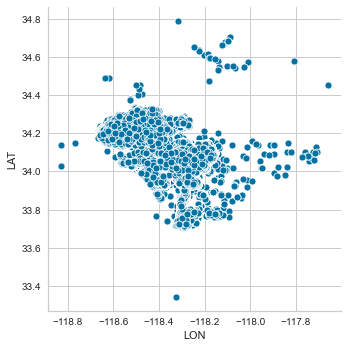

In [66]:
sns.relplot(y='LAT', x='LON', data=location)

* Now we plot a random sample of the data onto a real Los angeles map in order to get an idea of the crime distribution

* We will use StandardScaler() to transform the data so that all features have equal variance.
* This is a necessary step for all clustering analysis

In [66]:
scaler = StandardScaler()
X = scaler.fit_transform(location)
scaled_location = pd.DataFrame(X, index=location.index, 
                             columns=location.columns)
scaled_location

,LAT,LON
0,-0.825199,0.843799
1,-1.020012,-0.349844
2,-0.481260,1.004899
3,0.201447,0.278538
4,-0.340753,1.038815
...,...,...
2113788,0.154899,0.094828
2113789,0.076457,-0.133161
2113790,-0.125252,0.678931
2113791,1.278952,-1.407825


* Now we use kmeans clustering 

<Figure size 576x396 with 0 Axes>

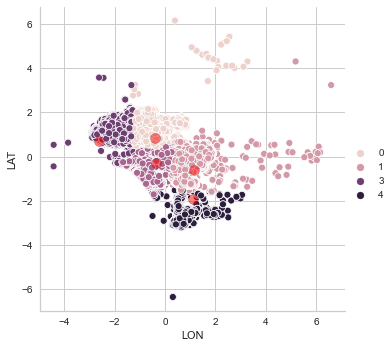

In [67]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(scaled_location)
plt.figure()
sns.relplot(x='LON', y='LAT', hue=kmeans.labels_, data=scaled_location)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='red', edgecolor='black', s=100, alpha=0.5)

* Next up we will use the elbow method to find the best number of clusters.

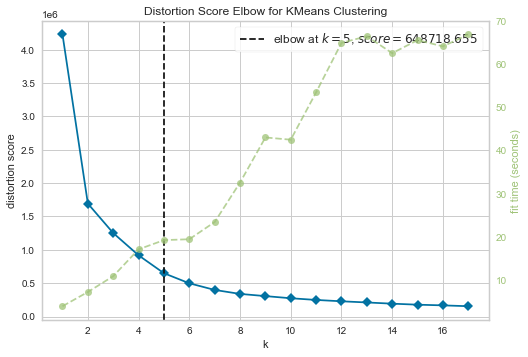

In [102]:
kmeans = KMeans(random_state=0)
visualizer = KElbowVisualizer(kmeans, k=(1,8))

visualizer.fit(scaled_location)
visualizer.show()

* We see that the optimal number of clusters to use for this analysis is $5$ as we had calculated in the start
* That means the best number of groups in order to to create groups with members that are more similar between them than with members of other groups is $5$

* Now we create a dataframe with the cluster each incident belongs to 
* Then we merge the location dataframe with the kmeans labels in order to depict incidents clustering on the real map

In [68]:
location['label'] = pd.DataFrame(kmeans.labels_)
location

,LAT,LON,label
0,33.9825,-118.2695,1
1,33.9599,-118.3962,2
2,34.0224,-118.2524,1
3,34.1016,-118.3295,2
4,34.0387,-118.2488,1
...,...,...,...
2113788,34.0962,-118.3490,2
2113789,34.0871,-118.3732,2
2113790,34.0637,-118.2870,1
2113791,34.2266,-118.5085,3


Transforming back the centroids in order to show them on the map
scaler.inverse_transform(kmeans.cluster_centers_[0, :] )

In [69]:
kmeans.cluster_centers_ = scaler.inverse_transform(kmeans.cluster_centers_[:, :] )

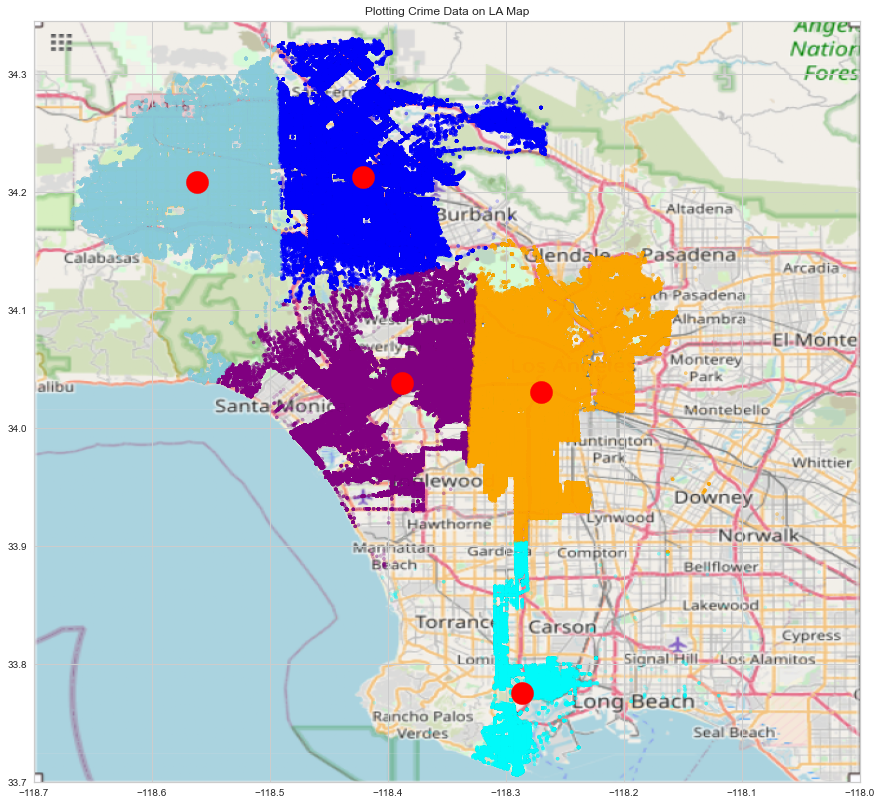

In [137]:
BBox = ((-118.7000, -118, 33.7000, 34.3450)) # coordinates of map
ruh_m = plt.imread('lamap.png') #importing the map
fig,ax1 = plt.subplots(figsize = (16,14))
colormap = colors.ListedColormap(['blue','orange' ,'purple','c','aqua']) # create new colormap
ax1.scatter(location.LON, location.LAT, zorder=1, alpha= 0.2, cmap=colormap,
           c=location.label, s=10, )
ax1.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], zorder=1, alpha= 1,color='red',
            s=500, ) #plotting the centroids
ax1.set_title('Plotting Crime Data on LA Map')
ax1.set_xlim(BBox[0],BBox[1])
ax1.set_ylim(BBox[2],BBox[3])
ax1.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

### Clustering on categorical variables
* We will try to cluster by using categorical variables
* We will use kmodes to do that, an adaptation of kmeans where we can use categorical variables
* Kmodes defines clusters based on the number of matching categories between data points.
* We want to identify specific attributes combinations e.g. crime type, weapon used, victim sex that describe groups of crimes 

* Only crime type, weapon used and premises are going to be used
* We are going to try clean the crimes from crime attributes that rarely appear

We pick crime types that have more than $5000$ occurances in the decade

In [87]:
crime_types = la_crimes['CRM_DESC'].value_counts()[:35].index
crime_types = pd.DataFrame(crime_types, columns=['CRM_DESC'])
crime_types

,CRM_DESC
0,BATTERY - SIMPLE ASSAULT
1,BURGLARY FROM VEHICLE
2,VEHICLE - STOLEN
3,THEFT PLAIN - PETTY ($950 & UNDER)
4,BURGLARY
5,THEFT OF IDENTITY
6,INTIMATE PARTNER - SIMPLE ASSAULT
7,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA..."
8,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT"
9,VANDALISM - MISDEAMEANOR ($399 OR UNDER)


We also pick weapon used types that have at least around $2500$  occurances in the decade

In [94]:
weapon_types = la_crimes['WEAPON_DESC'].value_counts()[:23].index
weapon_types = pd.DataFrame(weapon_types, columns=['WEAPON_DESC'])
weapon_types

,WEAPON_DESC
0,unknown
1,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)"
2,VERBAL THREAT
3,UNKNOWN WEAPON/OTHER WEAPON
4,HAND GUN
5,SEMI-AUTOMATIC PISTOL
6,KNIFE WITH BLADE 6INCHES OR LESS
7,OTHER KNIFE
8,UNKNOWN FIREARM
9,VEHICLE


Lastly, premises types that have at least around  $9000$  occurances in the decade are selected

In [99]:
premises_types = la_crimes['PREMIS_DESC'].value_counts()[:22].index
premises_types = pd.DataFrame(premises_types, columns=['PREMIS_DESC'])
premises_types

,PREMIS_DESC
0,STREET
1,SINGLE FAMILY DWELLING
2,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)"
3,PARKING LOT
4,SIDEWALK
5,OTHER BUSINESS
6,"VEHICLE, PASSENGER/TRUCK"
7,DRIVEWAY
8,GARAGE/CARPORT
9,RESTAURANT/FAST FOOD


* Now we merge all the data into a new dataframe which contains the most occured crime types, weapons used and premises

In [101]:
crimes_kmode = pd.merge (la_crimes, crime_types, on='CRM_DESC' )
crimes_kmode = pd.merge (crimes_kmode, weapon_types, on='WEAPON_DESC' )
crimes_kmode = pd.merge (crimes_kmode, premises_types, on='PREMIS_DESC' )
crimes_kmode

,DR_NO,DATE_OCC,AREA_NAME,CRM_DESC,Mocodes,VICT_AGE,VICT_SEX,VICT_DESC,PREMIS_DESC,WEAPON_DESC,STATUS,CRM_CD2,CRM_CD3,CRM_CD4,LOCATION,LAT,LON
0,1307355,2010-02-20 13:50:00,Newton,VIOLATION OF COURT ORDER,0913 1814 2000,48,M,H,SINGLE FAMILY DWELLING,unknown,Adult Arrest,-1,-1,-1,300 E GAGE AV,33.9825,-118.2695
1,100205595,2010-01-30 20:25:00,Rampart,VIOLATION OF COURT ORDER,unknown,38,F,H,SINGLE FAMILY DWELLING,unknown,Adult Other,-1,-1,-1,400 HARTFORD AV,34.0567,-118.2636
2,100209630,2010-04-11 18:51:00,Rampart,VIOLATION OF COURT ORDER,unknown,25,F,H,SINGLE FAMILY DWELLING,unknown,Invest Cont,-1,-1,-1,1200 S WESTLAKE AV,34.0482,-118.2804
3,100210217,2010-04-21 18:30:00,Rampart,VIOLATION OF COURT ORDER,0906 1816,0,M,H,SINGLE FAMILY DWELLING,unknown,Invest Cont,-1,-1,-1,8TH,34.0501,-118.2686
4,100211380,2010-05-13 10:30:00,Rampart,VIOLATION OF COURT ORDER,1814 2000,29,F,H,SINGLE FAMILY DWELLING,unknown,Adult Other,-1,-1,-1,600 HELIOTROPE DR,34.0812,-118.2953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1769019,111319959,2011-08-26 16:00:00,Newton,ROBBERY,0202 0302 0337 0344 0601,42,M,H,PARKING UNDERGROUND/BUILDING,REVOLVER,Invest Cont,-1,-1,-1,1100 WALL ST,34.0365,-118.2541
1769020,121515714,2012-07-31 11:00:00,N Hollywood,ROBBERY,0355 0330 0202 0400 0301 0334 0341 0916 1316 0344,33,M,W,PARKING UNDERGROUND/BUILDING,REVOLVER,Invest Cont,-1,-1,-1,11100 CHANDLER BL,34.1681,-118.3724
1769021,152016248,2015-09-17 05:05:00,Olympic,ROBBERY,0202 0209 0302 0334 0354 0355 0432 1206 1309,47,M,B,PARKING UNDERGROUND/BUILDING,REVOLVER,Invest Cont,-1,-1,-1,500 S KENMORE AV,34.0654,-118.2966
1769022,160126071,2016-10-26 13:30:00,Central,ROBBERY,0344 0334 1309 1310 0302,20,M,B,PARKING UNDERGROUND/BUILDING,REVOLVER,Invest Cont,-1,-1,-1,CESAR E CHAVEZ,34.0627,-118.2463


* We execute the kmodes algorithm with 10 different clusters (groups)

In [102]:
km = KModes(n_clusters=10, init='Huang', n_init=3, verbose=1)

clusters = km.fit_predict(crimes_kmode[['CRM_DESC','WEAPON_DESC','PREMIS_DESC']])

# Print the cluster centroids
print(km.cluster_centroids_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 280740, cost: 1844040.0
Run 1, iteration: 2/100, moves: 5288, cost: 1844040.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 209320, cost: 1882730.0
Run 2, iteration: 2/100, moves: 81725, cost: 1882730.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 145875, cost: 1831313.0
Best run was number 3
[['BURGLARY' 'unknown' 'SINGLE FAMILY DWELLING']
 ['TRESPASSING' 'unknown' 'DRIVEWAY']
 ['VANDALISM - MISDEAMEANOR ($399 OR UNDER)' 'unknown' 'OTHER BUSINESS']
 ['THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD' 'unknown'
  'MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)']
 ['VEHICLE - STOLEN' 'unknown' 'STREET']
 ['BATTERY - SIMPLE ASSAULT'
  'STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)' 'STREET']
 ['VANDALISM - MISDEAMEANOR ($399 OR UNDER)' 'unk

* We can see in most groups the weapon type is unknown.
* That's why we try to execute the algorithm without the rows with unknown weapon

In [106]:
crimes_kmode = crimes_kmode.loc[crimes_kmode['WEAPON_DESC'] != 'unknown']

In [107]:
km = KModes(n_clusters=10, init='Huang', n_init=3, verbose=1)

clusters = km.fit_predict(crimes_kmode[['CRM_DESC','WEAPON_DESC','PREMIS_DESC']])

# Print the cluster centroids
print(km.cluster_centroids_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 128277, cost: 548348.0
Run 1, iteration: 2/100, moves: 55227, cost: 543041.0
Run 1, iteration: 3/100, moves: 459, cost: 543041.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 169194, cost: 498624.0
Run 2, iteration: 2/100, moves: 22260, cost: 498624.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 130224, cost: 543223.0
Run 3, iteration: 2/100, moves: 802, cost: 543223.0
Best run was number 2
[['ROBBERY' 'STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)' 'SIDEWALK']
 ['BATTERY - SIMPLE ASSAULT'
  'STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)'
  'SINGLE FAMILY DWELLING']
 ['ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT' 'HAND GUN' 'STREET']
 ['INTIMATE PARTNER - SIMPLE ASSAULT'
  'STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)'
  'SINGLE FAMILY DW

Conclusions : 
* Usually burglaries happen at a single family dwelling with an unknown weapon. On the other side burglaries from vehicles take place at parking lots with unknown weapons
* Generally, trespassing concerns driveways of people
* Many grand thefts of $950.01$ $ and over happen at multi unit dwellings as apartments, duplex etc with different (unknown) weapons
* Usually vehicles thefts happen at the street
* Typically battery - simple assault takes place at the street, the sidewalk and single family dwellings with the use of hands, fist, feet or bodily force as a weapon
* Generally, vandalism both as a misdeameanor and felony happens at vehicles or trucks
* Most intimate partner simple assaults occur at a multi-unit dwelling as apartment or duplex or single family dwellings with the use of hands,fist, feet or bodily force as a weapon
* Typically, robberies take place at the sidewalk or street with the use of hands,fist, feet or bodily force as a weapon
* Also, generally hand guns are used for assaults with deadly weapon ( aggravated assaults) which take place at the street
* Lastly, criminal threats with no weapon happen at single family dwellings with the use of verbal threats.

Note: It is very important to understand how the kmode algorithm works. The algorithm tries to create modes(groups) that will fit as many as possible, similar incidents in each particular group. That means if an incident has two of the three columns we investigate equal to a centroid, it will probably belong to that particular centroid (group). As a result the centroids may not always describe groups with the most amount of occurances but it surely associates different types of crimes with different types of weapons and different types of premises which commonly occur.

In [125]:
la_crimes.loc[(la_crimes['CRM_DESC'] == 'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD') &
             (la_crimes['WEAPON_DESC'] == 'unknown') &
             (la_crimes['PREMIS_DESC'] == 'SINGLE FAMILY DWELLING')]

,DR_NO,DATE_OCC,AREA_NAME,CRM_DESC,Mocodes,VICT_AGE,VICT_SEX,VICT_DESC,PREMIS_DESC,WEAPON_DESC,STATUS,CRM_CD2,CRM_CD3,CRM_CD4,LOCATION,LAT,LON
1037,100105977,2010-02-01 10:00:00,Central,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",unknown,37,M,B,SINGLE FAMILY DWELLING,unknown,Invest Cont,-1,-1,-1,200 S GRAND AV,34.0545,-118.2499
2611,100110691,2010-05-05 18:15:00,Central,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",0344,30,F,O,SINGLE FAMILY DWELLING,unknown,Invest Cont,-1,-1,-1,1100 S GRAND AV,34.0416,-118.2620
4716,100116452,2010-08-31 20:00:00,Central,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",0344 0800 1019,30,M,K,SINGLE FAMILY DWELLING,unknown,Invest Cont,998,-1,-1,200 S GRAND AV,34.0545,-118.2499
5229,100117809,2010-08-13 12:00:00,Central,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",0344,28,F,B,SINGLE FAMILY DWELLING,unknown,Invest Cont,-1,-1,-1,700 S SPRING ST,34.0445,-118.2523
7314,100204749,2010-01-13 08:30:00,Rampart,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",0100 0344 0352 1202 1221,76,F,O,SINGLE FAMILY DWELLING,unknown,Invest Cont,-1,-1,-1,300 HELIOTROPE DR,34.0763,-118.2956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2114271,202105618,2019-06-01 09:00:00,Topanga,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",0344,37,M,W,SINGLE FAMILY DWELLING,unknown,Adult Other,-1,-1,-1,5900 PENFIELD AV,34.1785,-118.5698
2114518,190216790,2019-08-18 13:15:00,Rampart,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",0344 0216 0342,38,F,H,SINGLE FAMILY DWELLING,unknown,Adult Other,-1,-1,-1,3300 LONDON ST,34.0780,-118.2806
2114558,191513065,2019-06-08 17:30:00,N Hollywood,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",0344 1202,62,M,W,SINGLE FAMILY DWELLING,unknown,Invest Cont,-1,-1,-1,3100 OAKSHIRE DR,34.1275,-118.3548
2114584,190605262,2019-01-24 12:00:00,Hollywood,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",0344 0352,38,M,W,SINGLE FAMILY DWELLING,unknown,Invest Cont,-1,-1,-1,1500 N DOHENY DR,34.0988,-118.3897


## Clustering & examining different districts criminality
We start by clearing crime types that are very rare

In [70]:
crime_types = la_crimes['CRM_DESC'].value_counts()[:100].index
crime_types = pd.DataFrame(crime_types, columns=['CRM_DESC'])
crime_types

,CRM_DESC
0,BATTERY - SIMPLE ASSAULT
1,BURGLARY FROM VEHICLE
2,VEHICLE - STOLEN
3,THEFT PLAIN - PETTY ($950 & UNDER)
4,BURGLARY
...,...
95,RECKLESS DRIVING
96,SHOPLIFTING - ATTEMPT
97,"DEFRAUDING INNKEEPER/THEFT OF SERVICES, OVER $400"
98,LEWD/LASCIVIOUS ACTS WITH CHILD


In [71]:
la_crimes_clearedcrimes = pd.merge(la_crimes, crime_types, on='CRM_DESC')
la_crimes_clearedcrimes

,DR_NO,DATE_OCC,AREA_NAME,DISTR_NO,CRM_DESC,Mocodes,VICT_AGE,VICT_SEX,VICT_DESC,PREMIS_DESC,WEAPON_DESC,STATUS,CRM_CD2,CRM_CD3,CRM_CD4,LOCATION,LAT,LON
0,1307355,2010-02-20 13:50:00,Newton,1385,VIOLATION OF COURT ORDER,0913 1814 2000,48,M,H,SINGLE FAMILY DWELLING,unknown,Adult Arrest,-1,-1,-1,300 E GAGE AV,33.9825,-118.2695
1,90631215,2010-01-05 01:50:00,Hollywood,646,VIOLATION OF COURT ORDER,1100 0400 1402,47,F,W,STREET,HAND GUN,Invest Cont,998,-1,-1,CAHUENGA BL,34.1016,-118.3295
2,100104288,2010-01-06 10:00:00,Central,123,VIOLATION OF COURT ORDER,1501,31,F,B,"GOVERNMENT FACILITY (FEDERAL,STATE, COUNTY & C...",VERBAL THREAT,Invest Cont,-1,-1,-1,200 W TEMPLE ST,34.0549,-118.2426
3,100105672,2010-02-01 18:40:00,Central,185,VIOLATION OF COURT ORDER,1501,34,M,W,OFFICE BUILDING/OFFICE,unknown,Adult Other,-1,-1,-1,100 E 9TH ST,34.0416,-118.2550
4,100105709,2010-02-02 16:00:00,Central,157,VIOLATION OF COURT ORDER,0601,0,M,B,OTHER RESIDENCE,unknown,Invest Cont,-1,-1,-1,500 S SAN PEDRO ST,34.0442,-118.2439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2112604,190122258,2019-03-06 00:01:00,Central,155,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,1501,0,X,X,POLICE FACILITY,unknown,Invest Cont,-1,-1,-1,200 E 6TH ST,34.0448,-118.2474
2112605,191225880,2019-09-06 00:01:00,77th Street,1258,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,1501,0,X,X,POLICE FACILITY,unknown,Adult Arrest,-1,-1,-1,7600 S BROADWAY,33.9708,-118.2783
2112606,191006581,2019-01-28 07:00:00,West Valley,1008,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,1501,0,F,X,"GOVERNMENT FACILITY (FEDERAL,STATE, COUNTY & C...",unknown,Invest Cont,-1,-1,-1,8100 BALBOA PL,34.2179,-118.5014
2112607,190704447,2019-01-10 11:00:00,Wilshire,711,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,1501 2004,0,M,W,POLICE FACILITY,unknown,Adult Arrest,-1,-1,-1,LAUREL,34.0761,-118.3648


We create a pivot table with all the sum of all the different crimes for each district

In [72]:
distr_crimes = la_crimes_clearedcrimes.pivot_table(index="DISTR_NO", columns="CRM_DESC", values='DR_NO',aggfunc='count')
distr_crimes = distr_crimes.reset_index()
distr_crimes = distr_crimes.fillna(0)

* At this point we drop the rows that are not connected with the criminality of the particular district but stem from other factors. For example, the letters, phone calls received as LEWD (underaged) and the intimate partner crimes are not connected directly to the place  

In [73]:
distr_crimes = distr_crimes.drop(['INTIMATE PARTNER - SIMPLE ASSAULT', 'LETTERS, LEWD  -  TELEPHONE CALLS, LEWD',
    'INTIMATE PARTNER - AGGRAVATED ASSAULT','CHILD NEGLECT (SEE 300 W.I.C.)',
    'THREATENING PHONE CALLS/LETTERS'],   axis=1)
distr_crimes

CRM_DESC,DISTR_NO,ARSON,ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",ATTEMPTED ROBBERY,BATTERY - SIMPLE ASSAULT,BATTERY ON A FIREFIGHTER,BATTERY POLICE (SIMPLE),BATTERY WITH SEXUAL CONTACT,BIKE - STOLEN,...,THROWING OBJECT AT MOVING VEHICLE,TRESPASSING,UNAUTHORIZED COMPUTER ACCESS,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)",VANDALISM - MISDEAMEANOR ($399 OR UNDER),VEHICLE - ATTEMPT STOLEN,VEHICLE - STOLEN,VIOLATION OF COURT ORDER,VIOLATION OF RESTRAINING ORDER,VIOLATION OF TEMPORARY RESTRAINING ORDER
0,100,0.0,0.0,1.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,101,2.0,0.0,56.0,6.0,112.0,1.0,2.0,9.0,16.0,...,1.0,23.0,2.0,85.0,105.0,6.0,180.0,8.0,8.0,1.0
2,105,3.0,1.0,16.0,4.0,31.0,0.0,1.0,0.0,3.0,...,0.0,2.0,0.0,45.0,28.0,2.0,82.0,3.0,1.0,0.0
3,109,2.0,0.0,1.0,1.0,2.0,0.0,0.0,2.0,1.0,...,0.0,0.0,0.0,6.0,0.0,0.0,4.0,0.0,0.0,0.0
4,111,21.0,8.0,256.0,56.0,674.0,0.0,21.0,73.0,67.0,...,8.0,65.0,3.0,303.0,284.0,8.0,360.0,31.0,29.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,2189,14.0,0.0,60.0,12.0,253.0,2.0,5.0,17.0,3.0,...,5.0,46.0,6.0,201.0,90.0,4.0,181.0,13.0,22.0,0.0
1299,2196,0.0,0.0,13.0,1.0,57.0,0.0,1.0,3.0,0.0,...,1.0,24.0,3.0,41.0,33.0,1.0,32.0,13.0,19.0,2.0
1300,2197,0.0,0.0,8.0,0.0,18.0,0.0,0.0,0.0,0.0,...,0.0,15.0,1.0,29.0,13.0,1.0,11.0,3.0,3.0,0.0
1301,2198,0.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,7.0,4.0,0.0,4.0,0.0,1.0,0.0


We create a new dataframe with the district codes and we drop the column because it is not useful for clustering

In [74]:
distr_codes= pd.DataFrame()
distr_codes['DISTR_NO'] = distr_crimes['DISTR_NO'].copy()
distr_crimes = distr_crimes.drop(['DISTR_NO'], axis=1)
distr_codes

,DISTR_NO
0,100
1,101
2,105
3,109
4,111
...,...
1298,2189
1299,2196
1300,2197
1301,2198


* Now we will use cluster analysis to find groups with districts that are most similar to each other and most different to districts of other clusters when it comes to the types of crimes committed  
* We will use StandardScaler() to transform the data so that all columns have equal variance. Necessary step in clustering

In [75]:
scaler = StandardScaler()
X = scaler.fit_transform(distr_crimes)
scaled_distr_crimes = pd.DataFrame(X, index=distr_crimes.index, 
                             columns=distr_crimes.columns)
scaled_distr_crimes

CRM_DESC,ARSON,ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",ATTEMPTED ROBBERY,BATTERY - SIMPLE ASSAULT,BATTERY ON A FIREFIGHTER,BATTERY POLICE (SIMPLE),BATTERY WITH SEXUAL CONTACT,BIKE - STOLEN,BOAT - STOLEN,...,THROWING OBJECT AT MOVING VEHICLE,TRESPASSING,UNAUTHORIZED COMPUTER ACCESS,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)",VANDALISM - MISDEAMEANOR ($399 OR UNDER),VEHICLE - ATTEMPT STOLEN,VEHICLE - STOLEN,VIOLATION OF COURT ORDER,VIOLATION OF RESTRAINING ORDER,VIOLATION OF TEMPORARY RESTRAINING ORDER
0,-0.788017,-0.545349,-0.799151,-0.761967,-0.893136,-0.379811,-0.465930,-0.877134,-0.359013,-0.295999,...,-0.745572,-0.772783,-0.646482,-1.212413,-1.102325,-0.882572,-1.075661,-0.820162,-0.996672,-0.581822
1,-0.206598,-0.545349,-0.172559,-0.265131,-0.216489,1.142938,-0.216502,0.035973,0.162969,-0.295999,...,-0.156081,0.300013,0.505078,0.014568,0.573766,1.177114,0.502534,-0.393504,-0.459034,-0.056084
2,0.084112,-0.102061,-0.628262,-0.430743,-0.728717,-0.379811,-0.341216,-0.877134,-0.261142,-0.295999,...,-0.745572,-0.679496,-0.646482,-0.562835,-0.667186,-0.196010,-0.356705,-0.660166,-0.929467,-0.581822
3,-0.206598,-0.545349,-0.799151,-0.679161,-0.912108,-0.379811,-0.465930,-0.674221,-0.326389,-0.295999,...,-0.745572,-0.772783,-0.646482,-1.125802,-1.118441,-0.882572,-1.040590,-0.820162,-0.996672,-0.581822
4,5.316883,3.000948,2.105957,3.875163,3.337486,-0.379811,2.153060,6.529177,1.826789,-0.295999,...,3.970351,2.259032,1.080858,3.161413,3.458577,1.863677,2.080729,0.833137,0.952264,-0.581822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,3.281917,-0.545349,-0.126988,0.231704,0.675166,2.665688,0.157639,0.847623,-0.261142,-0.295999,...,2.201880,1.372810,2.808197,1.689036,0.332022,0.490552,0.511302,-0.126843,0.481831,-0.581822
1299,-0.788017,-0.545349,-0.662440,-0.679161,-0.564298,-0.379811,-0.341216,-0.572765,-0.359013,-0.295999,...,-0.156081,0.346657,1.080858,-0.620575,-0.586605,-0.539291,-0.795093,-0.126843,0.280217,0.469654
1300,-0.788017,-0.545349,-0.719402,-0.761967,-0.810927,-0.379811,-0.465930,-0.877134,-0.359013,-0.295999,...,-0.745572,-0.073133,-0.070702,-0.793796,-0.908930,-0.539291,-0.979216,-0.660166,-0.795058,-0.581822
1301,-0.788017,-0.545349,-0.810543,-0.761967,-0.905784,-0.379811,-0.465930,-0.775677,-0.359013,-0.295999,...,-0.745572,-0.726139,-0.646482,-1.111367,-1.053976,-0.882572,-1.040590,-0.820162,-0.929467,-0.581822


Elbow method is used to find the best amount of clusters

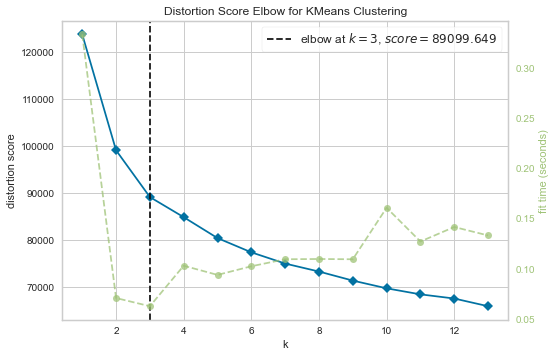

In [414]:
kmeans = KMeans(random_state=0)
visualizer = KElbowVisualizer(kmeans, k=(1,14))

visualizer.fit(scaled_distr_crimes)
visualizer.show()

* Now we can use kmeans clustering

In [425]:
kmeans = KMeans(n_clusters=3, random_state=0, n_init=100).fit(scaled_distr_crimes)
print(kmeans.cluster_centers_)

[[-0.52986689 -0.36590593 -0.59160509 -0.55581315 -0.63506434 -0.25799087
  -0.31647298 -0.58266697 -0.22241044 -0.11937339 -0.14750069 -0.65041124
  -0.382155   -0.58285211 -0.52177121 -0.6118469  -0.58161117 -0.52409285
  -0.5010974  -0.41062155 -0.58870352 -0.53639917 -0.42469259 -0.32281786
  -0.3272882  -0.2275515  -0.21170436 -0.46093491 -0.70898282 -0.58241081
  -0.50407029 -0.25272328 -0.17417272 -0.50364027 -0.45950827 -0.57435081
  -0.2399982  -0.28869345 -0.04242943 -0.21488768 -0.534505   -0.33812203
  -0.37685252 -0.19260197 -0.11479721 -0.27863263 -0.53319572 -0.49050366
  -0.36508786 -0.38818907 -0.21746905 -0.47916986 -0.47072252 -0.47128874
  -0.12899276 -0.3558874  -0.18065484 -0.17954652 -0.16975971 -0.40382983
  -0.47035625 -0.58304711 -0.24859413 -0.39130227 -0.54945695 -0.08559798
  -0.5427663  -0.39173199 -0.18909971 -0.18463201 -0.11129715 -0.39166268
  -0.22513416 -0.45894522 -0.47864784 -0.36679809 -0.56987995 -0.76239044
  -0.27461632 -0.6638175  -0.43534263 

By checking the centroids centers, we can understand the type of district it describes. 
* In details, the first centroid has values below 0 for all the columns which means this centroid describes the safer district, meaning the ones with the lesser crime types reported
* The second centroid has values above 1 in most columns which means this centroid describes the more dangerous district, meaning the ones with the most crime types reported
* Lastly, the third centroid has values slightly above (sometimes below) 0 for all the columns which means this centroid describes the medium safe district, meaning the ones with the average crime types reported

We get for each district its label in order to depict it on the map

In [426]:
distr_codes['label'] = pd.DataFrame(kmeans.labels_)
distr_codes

,DISTR_NO,label
0,100,0
1,101,2
2,105,0
3,109,0
4,111,1
...,...,...
1298,2189,2
1299,2196,0
1300,2197,0
1301,2198,0


* It would be more suiting to swap values of labels for lable 1 and 0 (because label 0 is medium safe and 1 is safe district) in order to have a continuous extent.

In [427]:
indexes_2 = distr_codes.loc[distr_codes['label'] == 2].index
indexes_1 = distr_codes.loc[distr_codes['label'] == 1].index
distr_codes.loc[indexes_2,'label'] = 1
distr_codes.loc[indexes_1,'label'] = 2

* New dataframe that includes labels, district and longtitude and latitude for every case

In [428]:
crime_data_district = pd.merge(distr_codes, la_crimes[['DISTR_NO','LAT','LON']], on='DISTR_NO')
crime_data_district

,DISTR_NO,label,LAT,LON
0,100,0,34.0428,-118.2461
1,100,0,34.0428,-118.2461
2,100,0,34.0423,-118.2452
3,100,0,34.0460,-118.2509
4,100,0,34.0407,-118.2680
...,...,...,...,...
2114694,2198,0,34.1483,-118.6034
2114695,2198,0,34.1467,-118.6054
2114696,2198,0,34.1490,-118.6052
2114697,2198,0,34.1446,-118.5985


* We will use a map in order to showcase the results 

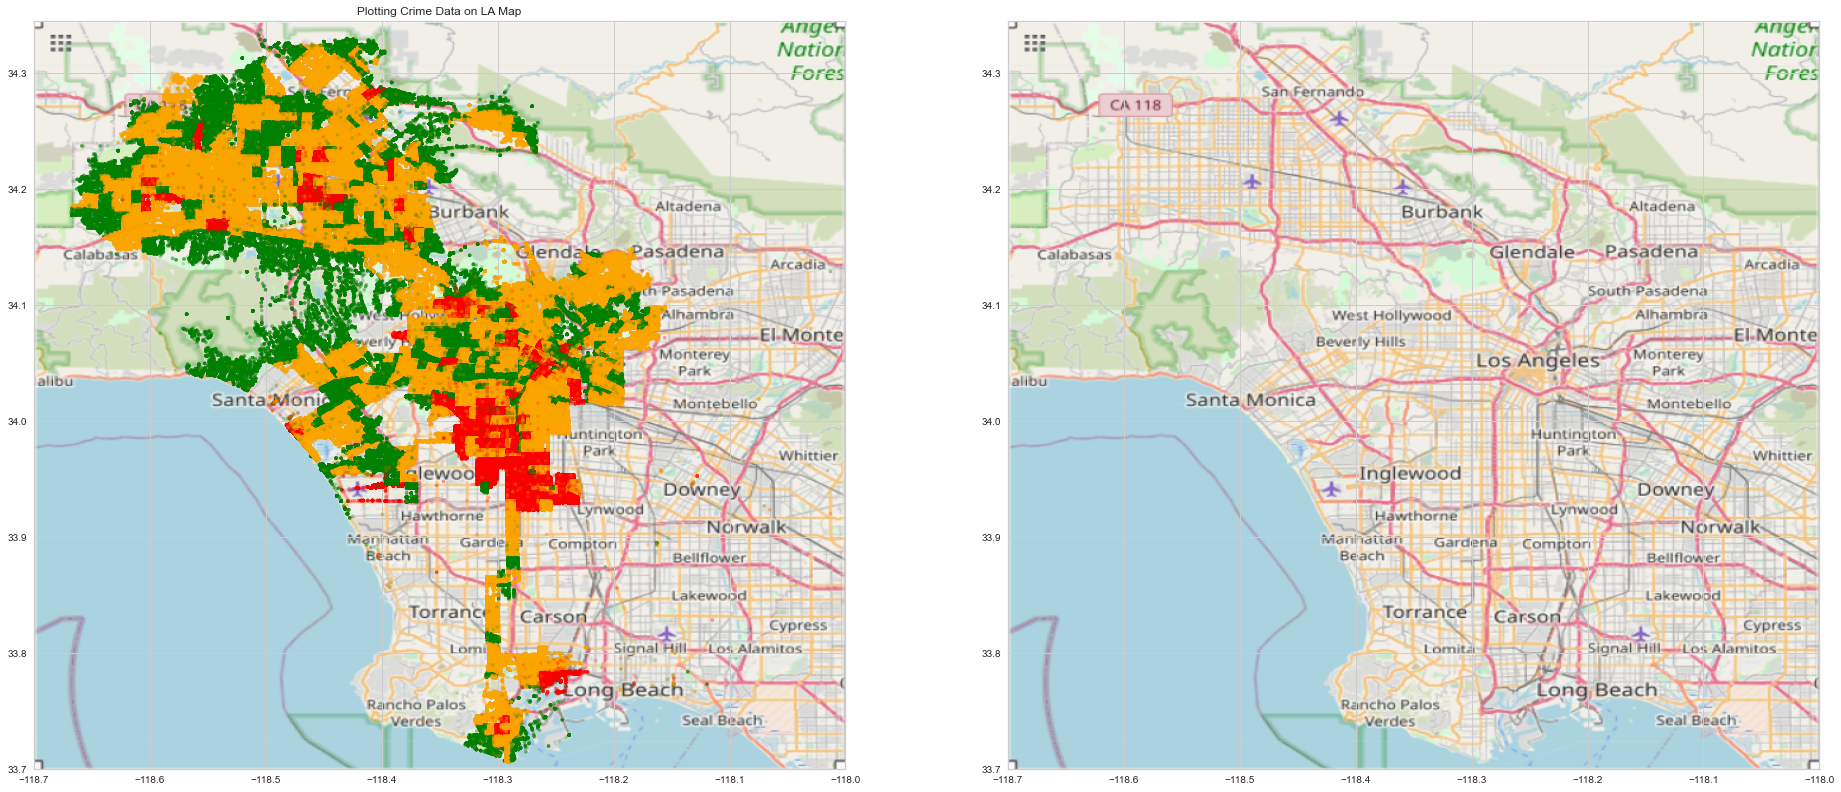

In [423]:
BBox = ((-118.7000, -118, 33.7000, 34.3450)) # coordinates of map
ruh_m = plt.imread('lamap.png') #importing the map
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (32,28))
colormap = colors.ListedColormap(['green','orange' ,'red']) # create new colormap
ax1.scatter(crime_data_district.LON, crime_data_district.LAT, zorder=1, alpha= 0.2, cmap=colormap,
           c=crime_data_district.label, s=10, )
ax1.set_title('Plotting Crime Data on LA Map')
ax1.set_xlim(BBox[0],BBox[1])
ax1.set_ylim(BBox[2],BBox[3])
ax1.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')
ax2.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

## Conclusions
In the map we can see three different colors of points. Every point is a reported crime incident from 2010 till 2019. Firstly we grouped by each district taking the sum of counts for each different crime type commited in that district. Then we clustered the districts into 3 different clusters. After finding out that each different cluster defines the safety of the district because of the values of the centroids ( one centroid has negative values after normalization, one centroid has values around 0 and the other values around 1), we can make conclusions on the safety of the regions
* The green points of the map concern districts with lesser crimes that normally. Those are the safer zones. That is because those districts belong to the clusters with the negative values of the centroid. Some examples are: Bel Air, Beverly Hills, West Hollywood, Brentwood,  Mulholland Dr /Sepulveda Blvd and Palisades Dr / Ave De Santa Ynez
* The orange points of the map concern districts with average amount of crimes. Those are neither the safest nor the most dangerous zones. That is explained from the fact that those districts belong to the clusters with the  values of the centroid that are approximately 0. Some examples are:  Harbor Blvd, Forest Lawn Dr, Dolanco Junction and Tampa Ave
* The red points of the maps concern districts with more crimes that normally, those are considered the dangerous zones. That is because those districts belong to the clusters with the high (positive) values of the centroid. Examples are Downtown, South Park, Central city and Fashion District

Note: the regions that have no color are either very safe (no crimes committed) or there are no data crimes reported or the crimes incidents are missing. For example for the Marvin Braude Mulholland Gateway Park ( located on the north west LA, green forest) we can hypothesize that no crimes where commited there because people are not living there. However, for the area of Torrance we can hypothesize that the crimes for that region are missing because there are no incidents